In [151]:
%run ../demos/qsu.ipynb
from qecsim import paulitools as pt
from pymatching import Matching
import numpy as np
from qecsim.models.rotatedplanar import RotatedPlanarCode, RotatedPlanarReweightedMWPMDecoder
from qecsim.models.generic import INIDErrorModel

t = 1e-5

# T_1 and T_2 data from ibm_sherbrooke 11.03.2024 
T_1 = [4.47131398e-04, 2.26458412e-04, 2.92798247e-04, 2.90948197e-04, 3.40581391e-04, 2.83836831e-04, 2.70656858e-04, 1.53601864e-04, 3.61852447e-04, 2.42139994e-04, 2.00143049e-04, 3.61774782e-04, 2.45283244e-04, 3.47100922e-04, 2.93481282e-04, 4.21930409e-04, 2.52775994e-04, 2.77442387e-04, 2.46129903e-04, 3.78459014e-04, 2.45232302e-04, 2.96744679e-04, 1.78567010e-04, 3.93160649e-04, 3.59094685e-04, 2.86956081e-04, 3.45384767e-04, 3.86961497e-04, 2.05691776e-04, 4.28754692e-04, 3.74780068e-04, 2.88966813e-04, 2.47889883e-04, 3.86880708e-04, 1.24536308e-04, 2.62453326e-04, 9.64438829e-05, 2.64377947e-04, 1.28466986e-04, 1.31691725e-04, 4.36206180e-04, 2.22960692e-04, 4.25424927e-04, 3.95216491e-04, 2.28763892e-04, 4.03873696e-04, 2.71036498e-04, 3.23739417e-04, 3.55001763e-04, 4.63425047e-05, 2.94978244e-04, 2.28271419e-04, 4.06929723e-04, 2.56146538e-04, 1.72188791e-04, 1.73462107e-04, 2.74696491e-04, 2.30326227e-04, 3.00553262e-04, 2.27812102e-04, 2.89711877e-04, 2.59015813e-04, 1.16374746e-04, 2.10523923e-04, 3.21825423e-04, 2.52531191e-04, 3.50659516e-04, 3.59079952e-04, 2.68641573e-04, 2.33773519e-04, 2.97749853e-04, 2.08399114e-04, 2.43029285e-04, 2.85902283e-04, 2.84630852e-04, 3.55945256e-04, 2.97832844e-04, 2.36402484e-04, 2.49531082e-04, 1.33130091e-04, 2.19092374e-04, 2.40286350e-04, 3.34206274e-04, 3.67597836e-04, 2.55269321e-04, 2.47502383e-04, 2.61491269e-04, 2.02710898e-04, 2.40839962e-04, 3.28335949e-04, 2.54947652e-04, 1.86721803e-04, 4.09207513e-04, 3.30273185e-04, 2.61297556e-04, 2.64197469e-04, 1.26940583e-04, 2.75063562e-04, 2.02244248e-04, 3.59510470e-04, 1.84129054e-04, 2.68350896e-04, 2.43577740e-04, 2.18748598e-04, 5.43395245e-05, 3.00174758e-04, 1.12444264e-04, 2.96240040e-04, 2.45289428e-04, 1.33545326e-04, 3.30455266e-04, 1.86542047e-04, 1.80401351e-04, 3.43144232e-04, 2.29711485e-04, 2.86391366e-04, 1.98113525e-04, 2.63177780e-04, 3.06908883e-04, 3.28242820e-04, 1.92885813e-04, 1.40990586e-04, 7.05505794e-05, 2.17445019e-04, 3.10653668e-04]    
T_2 = [2.63153399e-04, 2.86761491e-04, 1.41151669e-04, 1.66627797e-04, 1.89576638e-04, 2.92269093e-04, 2.25063209e-04, 1.81702907e-04, 2.61984119e-04, 6.11325611e-05, 1.51575773e-04, 7.41630478e-05, 2.20899934e-04, 1.02816518e-04, 5.27691939e-05, 1.76258452e-04, 7.50720939e-05, 7.53161361e-05, 5.95427485e-05, 4.67441780e-05, 6.18971486e-05, 2.34925562e-05, 2.04210901e-04, 2.20918687e-04, 1.13223403e-04, 4.50195613e-04, 2.14757890e-04, 1.48510585e-04, 7.82218006e-05, 1.92858061e-04, 2.79777668e-04, 3.21622414e-05, 1.26789703e-04, 2.57254131e-04, 1.03558923e-04, 5.48399307e-05, 4.24278864e-05, 3.44606876e-04, 6.01732031e-05, 6.37432976e-05, 2.06647237e-04, 3.28893299e-04, 3.36020790e-04, 2.55291187e-04, 2.83855122e-04, 3.11659323e-04, 3.16825279e-04, 1.20567129e-04, 3.31208982e-04, 7.45987011e-05, 1.50608995e-04, 7.74456392e-05, 2.81359658e-04, 5.08315903e-05, 2.03901246e-04, 1.69324501e-05, 6.82253376e-05, 1.20970691e-04, 2.80741944e-04, 2.62828664e-04, 2.86550495e-04, 2.31743470e-04, 8.82750115e-05, 1.96014297e-04, 2.98465911e-04, 6.06746939e-05, 2.26737507e-04, 6.31369444e-05, 1.86726857e-05, 2.47944963e-04, 1.26382882e-04, 2.54025918e-04, 1.78993791e-04, 1.91150516e-04, 1.79769739e-04, 8.40042940e-05, 1.70200659e-04, 3.51177500e-04, 2.96748335e-05, 1.39399172e-04, 1.90544238e-04, 2.02677259e-04, 4.09724041e-05, 3.11031137e-04, 1.01932181e-04, 1.07444847e-04, 3.08357110e-04, 1.29828189e-04, 5.47172067e-05, 2.86959303e-04, 1.45406519e-04, 1.04390303e-04, 2.40856220e-05, 2.90835503e-04, 1.36119607e-04, 1.35983968e-04, 1.85294934e-04, 2.28204312e-04, 5.14639823e-05, 3.78015232e-04, 7.73972055e-05, 1.87827250e-04, 2.29362850e-04, 2.91204961e-04, 4.20846188e-05, 1.85991695e-04, 1.24689673e-04, 2.96066649e-04, 1.72330249e-04, 2.51645808e-04, 4.66399761e-05, 6.16320063e-05, 2.21848271e-04, 2.79667140e-04, 3.75513828e-04, 2.10413362e-04, 2.57497350e-04, 2.07386123e-04, 3.13663945e-04, 3.62394113e-05, 3.18518580e-04, 1.79348759e-04, 1.40142464e-04, 2.65291418e-05, 8.90078292e-05]
weight_T_1 = np.abs(np.log(1-np.exp(-t/np.array(T_1))))
weight_T_2 = np.abs(np.log(1-np.exp(-t/np.array(T_2))))

my_code = RotatedPlanarCode(5, 5)
my_error_model = INIDErrorModel(T_1[0:my_code.n_k_d[0]], T_2[0:my_code.n_k_d[0]])
my_decoder = RotatedPlanarReweightedMWPMDecoder(my_code, t, np.array(T_1[0:my_code.n_k_d[0]]), np.array(T_2[0:my_code.n_k_d[0]]))

https://pymatching.readthedocs.io/en/stable/toric-code-example.html

In [152]:
parity_check_matrix = my_code.stabilizers
# print("Parity-Check-Matrix according to Qecsim: (my_code.stabilizers.T) \n", parity_check_matrix)

parity_check_matrix_pymatching = parity_check_matrix #np.concatenate(np.flipud(np.hsplit(parity_check_matrix,2)), axis=1)
print("Parity-Check-Matrix changed for Pymatching: \n", parity_check_matrix_pymatching)

error = my_error_model.generate(my_code, t)
print("Error: \n", error, "; X-part: ", np.hsplit(error,2)[0], "; Z-part: ", np.hsplit(error,2)[1], "; Pauli-String: ", pt.bsf_to_pauli(error))

syndrome = pt.bsp(error, my_code.stabilizers.T)
print("Syndrome QECsim: pt.bsp(error, my_code.stabilizers.T)\n", syndrome)

# in pymatching the syndrome is calculated as follows:
syndrome_pymatching = parity_check_matrix_pymatching@error%2
print("Syndrome Pymatching: parity_check_matrix_pymatching@error%2 \n", syndrome_pymatching)


weights = np.concatenate((weight_T_2[0:my_code.n_k_d[0]], weight_T_1[0:my_code.n_k_d[0]]))
matching = Matching(parity_check_matrix_pymatching, weights)


decode_pymatching_pysyndr = matching.decode(syndrome_pymatching)
print("Decode PyMatching with pymatching syndrome: \n", decode_pymatching_pysyndr)
decode_pymatching_qecsynd = matching.decode(syndrome)
print("Decode PyMatching with Qecsim syndrome: \n", decode_pymatching_qecsynd, "\n")

decode_my_decoder = my_decoder.decode(my_code,syndrome)
print("Decode my Decoder: \n", decode_my_decoder)
decode_pymatching_X_Z_changed = np.concatenate(np.flipud(np.hsplit(decode_pymatching_qecsynd,2)))
print("Decode PyMatching with pymatching syndrome X-Z changed: \n", decode_pymatching_X_Z_changed)

qsu.print_pauli('original error:\n{}'.format(my_code.new_pauli(error)))
# qsu.print_pauli('Syndrome Qecsim:\n{}'.format(my_code.ascii_art(syndrome)))
# qsu.print_pauli('Syndrome Pymatching:\n{}'.format(my_code.ascii_art(syndrome_pymatching)))
qsu.print_pauli("Recovery Pymatching:\n{}".format(my_code.new_pauli(decode_pymatching_qecsynd)))
qsu.print_pauli("Recovery Pymatching X-Z changed:\n{}".format(my_code.new_pauli(np.concatenate(np.flipud(np.hsplit(decode_pymatching_qecsynd,2))))))
qsu.print_pauli("Recovery my Decoder:\n{}".format(my_code.new_pauli(decode_my_decoder)))

Parity-Check-Matrix changed for Pymatching: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Error: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0] ; X-part:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ; Z-part:  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ; Pauli-String:  IIIIIIIIIZIIIIIIIIIIIIIII
Syndrome QECsim: pt.bsp(error, my_code.stabilizers.T)
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0]
Syndrome Pymatching: parity_check_matrix_pymatching@error%2 
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Decode PyMatching with pymatching syndrome: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Decode PyMatching with Qecsim syndrome: 
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0] 

Decode my Decoder: 
 [0 0 0 0 0 0 0 0 0 

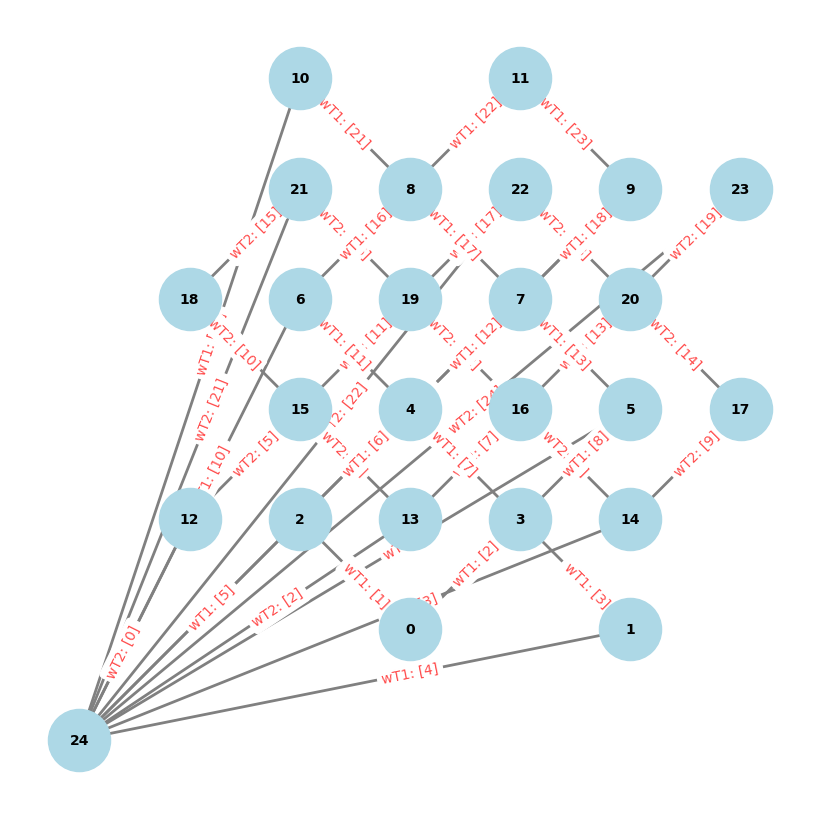

In [153]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
graph = matching.to_networkx()
# graph.remove_node(graph.number_of_nodes()-1)

pos =  my_code._plaquette_indices + [(-2,-2)]
nx.draw(graph, pos=pos, with_labels=True, font_weight='bold', node_size=2000, font_size=10, node_color='lightblue', font_color='black', font_family='sans-serif', edge_color='gray', width=2, edge_cmap=plt.cm.Blues)
#print the weights on the edges
edge_labels = {}
for key, value in nx.get_edge_attributes(graph, 'weight').items():
    if value in weight_T_1:
        edge_labels[key] = "wT1: " + str(np.where(weight_T_1 == value)[0])
    else:
        edge_labels[key] = "wT2: " + str(np.where(weight_T_2 == value)[0])
# edge_labels = nx.get_edge_attributes(graph, 'fault_ids')
nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=edge_labels, alpha=0.7, label_pos=0.4, font_color='red')
plt.show()

In [154]:
print(graph.get_edge_data(1,3))
print(graph.get_edge_data(14,24))
print(weight_T_1[3])
print(weight_T_2[3])

{'fault_ids': {28}, 'weight': 3.3876961096845304, 'error_probability': -1.0}
{'fault_ids': {3}, 'weight': 2.8430344042466476, 'error_probability': -1.0}
3.3876961096845304
2.8430344042466476


In [155]:
qubit_index = 5
for edge in graph.edges():
    if graph.get_edge_data(*edge)['weight'] == weight_T_1[qubit_index]:
        print(edge, f": T_1[{qubit_index}] = ", graph.get_edge_data(*edge)['weight'])
    if graph.get_edge_data(*edge)['weight'] == weight_T_2[qubit_index]:
        print(edge, f": T_2[{qubit_index}] = ", graph.get_edge_data(*edge)['weight'])

(12, 15) : T_2[5] =  3.392148581076852
(24, 2) : T_1[5] =  3.363378477459499


In [156]:
success = not (any(pt.bsp((decode_pymatching_X_Z_changed) ^ (error), my_code.stabilizers.T)) or any(pt.bsp((decode_pymatching_X_Z_changed) ^ (error), my_code.logicals.T)))
print("Success Pymatching: ", success)
success = not (any(pt.bsp((decode_my_decoder) ^ (error), my_code.stabilizers.T)) or any(pt.bsp((decode_my_decoder) ^ (error), my_code.logicals.T)))
print("Success my Decoder: ", success)

Success Pymatching:  True
Success my Decoder:  True


In [221]:
H = my_code.stabilizers

error = my_error_model.generate(my_code, t)
error_x, error_z = np.hsplit(error, 2)
print("Pauli-String: ", pt.bsf_to_pauli(error))
qsu.print_pauli('Error:\n{}'.format(my_code.new_pauli(error)))

syndrome = H @ error % 2
print("syndrome: ", syndrome)
print("syndrome bsp: ", pt.bsp(error, H.T))

matching = Matching(H)
decoding = matching.decode(syndrome, weights=weights)
qsu.print_pauli('Recovery pymatching:\n{}'.format(my_code.new_pauli(decoding)))

decode = my_decoder.decode(my_code, pt.bsp(error, H.T))
qsu.print_pauli('Recovery my Decoder:\n{}'.format(my_code.new_pauli(decode)))
print("Pymatching Pauli-String: ", pt.bsf_to_pauli(decoding))
print("my decoder Pauli_String: ", pt.bsf_to_pauli(decode))

Pauli-String:  IIIIIIIIIIIZIIIIIIIIIIIII


syndrome:  [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
syndrome bsp:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]


Pymatching Pauli-String:  IIIIIIIIIIIZIIIIIIIIIIIII
my decoder Pauli_String:  IIIIIIIIIIIZIIIIIIIIIIIII
